<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Chi-Squared Goodness of Fit Test </h1><center/>

**Link to the article** : https://medium.com/@soulawalid/chi-squared-goodness-of-fit-test-dbfa7683aa68?sk=aaea523a8e0cd6ac54b2a3a8acafdf2c

In [1]:
import scipy.stats as stats

observed = [55, 40, 35, 70]
expected = [50, 50, 50, 50]  # Expected frequencies are uniform for each age group

chi2_stat, p_val = stats.chisquare(f_obs=observed, f_exp=expected)
chi2_stat, p_val 

(15.0, 0.0018166489665723214)

In [2]:
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: The distribution of responses across age groups significantly differs.")
else:
    print("Fail to reject the null hypothesis: The distribution of responses fits the expected distribution.")

Reject the null hypothesis: The distribution of responses across age groups significantly differs.


In [3]:
df = len(observed) - 1  # degrees of freedom
critical_value = stats.chi2.ppf(1 - alpha, df)
critical_value

7.814727903251179

In [4]:
# Decision using the critical value
if chi2_stat > critical_value:
    print("Using critical value: Reject the null hypothesis - The distribution of responses significantly differs.")
else:
    print("Using critical value: Fail to reject the null hypothesis - The distribution fits the expected distribution.")

Using critical value: Reject the null hypothesis - The distribution of responses significantly differs.


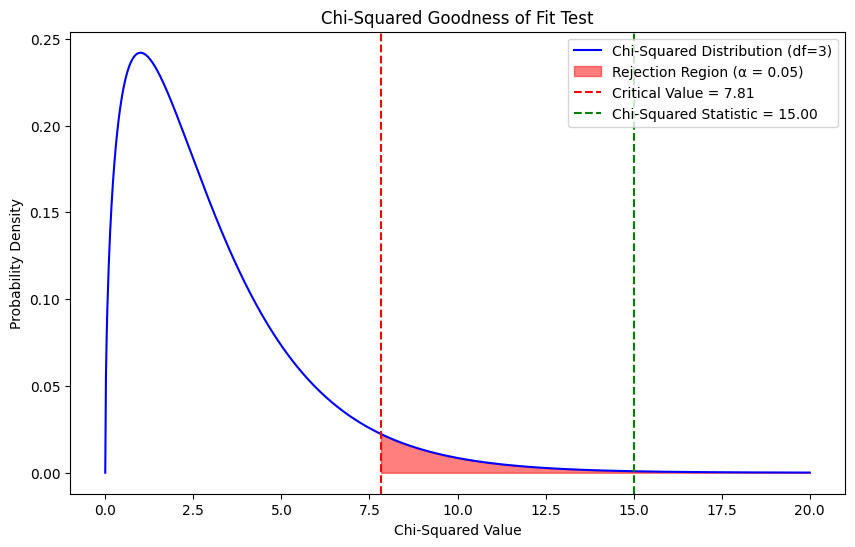

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 1000)
y = stats.chi2.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Chi-Squared Distribution (df={df})', color='blue')
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.5, label=f'Rejection Region (α = {alpha})')

# Mark the critical value
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value = {critical_value:.2f}')
# Mark the Chi-squared test statistic
plt.axvline(chi2_stat, color='green', linestyle='--', label=f'Chi-Squared Statistic = {chi2_stat:.2f}')

plt.title('Chi-Squared Goodness of Fit Test')
plt.xlabel('Chi-Squared Value')
plt.ylabel('Probability Density')
plt.legend(loc='upper right')
plt.show()